#  <span style = color:blue>Creatting a Multiple Regression Model for predicting the Price of the House</span>

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['Estimated Price'] = california_housing.target

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [7]:
y_pred = regressor.predict(X_test_scaled)

In [8]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [9]:
print('Accuracy of the model using R Square method: ', score * 100, '%', sep = '')

Accuracy of the model using R Square method: 59.13048824900672%


In [10]:
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1)

In [11]:
print('Accuracy of the model using Adhusted R Square method: ', adjusted_r2 * 100, '%', sep = '')

Accuracy of the model using Adhusted R Square method: 59.0776084020056%


### <span style = color:red> Visualizing the Predicted and Actual Values</span>

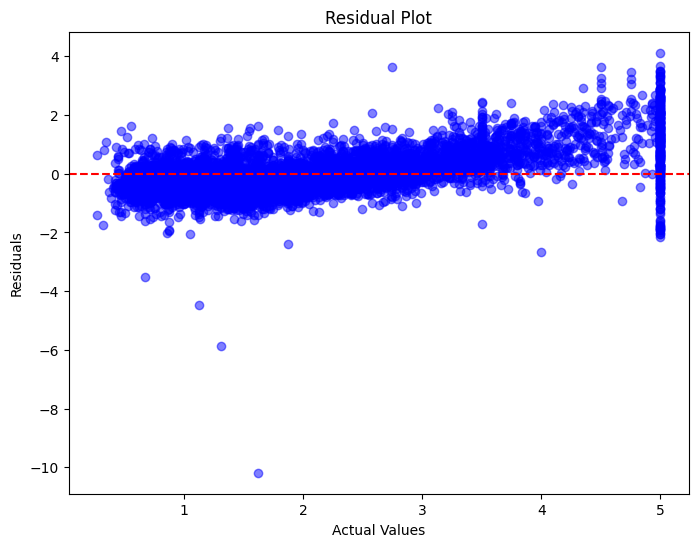

In [12]:
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue', marker='o', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### <span style = color:green> About the Graph 
<span style= font-weight:bold> The x-axis represents the actual values (y_test).
The y-axis represents the residuals (the differences between the actual values and the predicted values).
Points above the red dashed line indicate the model overestimated the target variable, while points below the line indicate underestimation.
This plot helps us to  visualize how well our model is performing across different ranges of actual values. Ideally, the residuals should be randomly scattered around the horizontal line.